# Netflix Movies and TV Shows

This notebook is on analysis of Netflix data that is the TV shows and movies on netflix. I have used Matplotlib and Seaboarn library for creating graphs for visualization of data. 
Matplotlib - It is cross platform, data visualization and graphical plotting library for python.
Seaborn - It is extended version of Matplotlib which uses Matplotlib, Numpy and Pandas to plot graphs. 

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset

Step 1: First we will install the important packages. <br>
Step 2: Then we need a dataset to explore and understand the practical knowledge of the pandas dataframe module.  <br>
Step 3: Here I have used the datasets available on Kaggle platform https://www.kaggle.com/datasets?fileType=csv    <br>
Step 4: Select the dataset that has enough rows and columns to explore and try different graphs.  <br>

In [2]:
import jovian
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

In [3]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [4]:
# Change this
dataset_url = 'https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows' 


opendatasets is a Python library for downloading datasets from online sources like Kaggle and Google Drive using a simple Python command.

In [12]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: poojapal07
Your Kaggle Key: ········


100%|██████████| 2.35M/2.35M [00:00<00:00, 27.8MB/s]

The dataset has been downloaded and extracted.

In [13]:
# Change this
data_dir = './netflix-movies-and-tv-shows'

In [14]:
import os
os.listdir(data_dir)

['titles.csv', 'credits.csv']

Let us save and upload our work to Jovian before continuing.

In [23]:
project_name = "netflix-movies-and-tv-shows" 

In [24]:
!pip install jovian --upgrade -q

In [25]:
import jovian

In [26]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

## Data Preparation and Cleaning

Now the dataset is loaded we would do some cleaning and prepare the data for analysis



In [27]:
import pandas as pd

In [28]:
data_titles_df = pd.read_csv(data_dir + "/titles.csv") # pd.read_csv will import a CSV file to dataframe format. 

In [29]:
data_credits_df = pd.read_csv(data_dir + "/credits.csv")

In [30]:
data_titles_df.info() #info() is used to give the no of non null entries in each column with the datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6137 entries, 0 to 6136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6137 non-null   object 
 1   title                 6137 non-null   object 
 2   type                  6137 non-null   object 
 3   description           6114 non-null   object 
 4   release_year          6137 non-null   int64  
 5   age_certification     3394 non-null   object 
 6   runtime               6137 non-null   int64  
 7   genres                6137 non-null   object 
 8   production_countries  6137 non-null   object 
 9   seasons               2306 non-null   float64
 10  imdb_id               5741 non-null   object 
 11  imdb_score            5669 non-null   float64
 12  imdb_votes            5653 non-null   float64
 13  tmdb_popularity       6061 non-null   float64
 14  tmdb_score            5885 non-null   float64
dtypes: float64(5), int64(

In [31]:
data_titles_df.describe() #Pandas describe() is used to view some basic statistical details like percentile, mean, std, etc. 
# of a data frame or a series of numeric values.


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,6137.000000,6137.000000,2306.000000,5669.000000,5.653000e+03,6061.000000,5885.000000
mean,2017.371843,76.381946,2.106678,6.540942,2.115029e+04,19.267196,6.633194
std,6.603620,39.086828,2.716844,1.135944,9.254225e+04,51.291407,1.251610
min,1945.000000,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,2017.000000,44.000000,1.000000,5.800000,5.170000e+02,3.381000,6.000000
50%,2019.000000,80.000000,1.000000,6.600000,2.095000e+03,7.580000,6.791000
75%,2021.000000,105.000000,2.000000,7.300000,8.884000e+03,16.523000,7.400000
max,2023.000000,225.000000,44.000000,9.600000,2.684317e+06,1078.637000,10.000000


In [32]:
data_credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81355 entries, 0 to 81354
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  81355 non-null  int64 
 1   id         81355 non-null  object
 2   name       81355 non-null  object
 3   character  70532 non-null  object
 4   role       81355 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.1+ MB


In [33]:
data_credits_df.describe()

,person_id
count,8.135500e+04
mean,6.269059e+05
std,7.383898e+05
min,7.000000e+00
25%,5.883400e+04
50%,2.425080e+05
75%,1.037428e+06
max,2.771013e+06


In [34]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

### Handling null values

It is really important to check how many values are null so that we can remove them or replace them with some default value. Here for the titles.csv file has null values for description,age_certification,seasons,imdb_db,imdb_Score,tmdb_popularity,tmdb_score
The credits.csv has null values for character
We will use dropna to drop some rows of column which has less number of null values and will replace the rows with defualt values which has higher number of null values. 

In [36]:
data_titles_df.isnull().sum()

id                         0
title                      0
type                       0
description               23
release_year               0
age_certification       2743
runtime                    0
genres                     0
production_countries       0
seasons                 3831
imdb_id                  396
imdb_score               468
imdb_votes               484
tmdb_popularity           76
tmdb_score               252
dtype: int64

In [37]:
data_titles_df = data_titles_df.dropna(subset=['imdb_id','imdb_score','imdb_votes','tmdb_popularity','tmdb_score'])

#### We are using dropna function here to drop/remove the rows which have nan values. As seen above there are many columns which have nan values for some I chose to remove and for some I will replace with some default value. Now the question is which one to remove and which one to replace. So for the columns having more nan values I have replaced but the ones with less value I removed them using dropna. 

In [38]:
import jovian

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

In [40]:
data_titles_df.isnull().sum()

id                         0
title                      0
type                       0
description                2
release_year               0
age_certification       2333
runtime                    0
genres                     0
production_countries       0
seasons                 3391
imdb_id                    0
imdb_score                 0
imdb_votes                 0
tmdb_popularity            0
tmdb_score                 0
dtype: int64

In [41]:
data_titles_df = data_titles_df.fillna({'description' : 'Not available','age_certification': 'Not available','seasons' : 'Not applicable'})

In [42]:
data_credits_df.isnull().sum()

person_id        0
id               0
name             0
character    10823
role             0
dtype: int64

In [43]:
data_credits_df = data_credits_df.fillna({'character' : 'Not available'})

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

In [45]:
data_titles_df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],Not applicable,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],Not applicable,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0079817,7.3,216307.0,75.699,7.246
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'comedy']",['GB'],Not applicable,tt0071853,8.2,547292.0,20.964,7.804


In [46]:
data_titles_df.tail()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
6128,tm1307029,Married to Work,MOVIE,"To save their real estate agency, an ambitious...",2023,Not available,76,"['comedy', 'romance']","['KE', 'TZ', 'NG']",Not applicable,tt26687699,7.5,25.0,8.446,3.8
6129,tm1304174,Thalaikoothal,MOVIE,A man's long battle to save his comatose fathe...,2023,Not available,142,['drama'],['IN'],Not applicable,tt16578852,8.4,96.0,5.665,7.0
6130,tm1299701,Dr Jason Leong: Ride with Caution,MOVIE,"The comic shares his diagnoses on ageing, the ...",2023,Not available,65,['comedy'],['MY'],Not applicable,tt26340263,5.9,102.0,5.379,2.0
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,Not available,120,['documentation'],['TR'],Not applicable,tt26349328,7.9,209.0,2.450,7.2
6135,tm1072700,All Na Vibes,MOVIE,The lives of three teenagers and a hit-man int...,2023,Not available,80,['drama'],['NG'],Not applicable,tt14922926,5.2,18.0,1.357,4.0


In [35]:
data_titles_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0075148,8.1,588100.0,106.361,7.782
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],Not applicable,tt0077631,7.2,283316.0,33.160,7.406
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],Not applicable,tt0070735,8.3,266738.0,24.616,8.020
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0079817,7.3,216307.0,75.699,7.246
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'comedy']",['GB'],Not applicable,tt0071853,8.2,547292.0,20.964,7.804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6128,tm1307029,Married to Work,MOVIE,"To save their real estate agency, an ambitious...",2023,Not available,76,"['comedy', 'romance']","['KE', 'TZ', 'NG']",Not applicable,tt26687699,7.5,25.0,8.446,3.800
6129,tm1304174,Thalaikoothal,MOVIE,A man's long battle to save his comatose fathe...,2023,Not available,142,['drama'],['IN'],Not applicable,tt16578852,8.4,96.0,5.665,7.000
6130,tm1299701,Dr Jason Leong: Ride with Caution,MOVIE,"The comic shares his diagnoses on ageing, the ...",2023,Not available,65,['comedy'],['MY'],Not applicable,tt26340263,5.9,102.0,5.379,2.000
6133,tm1260999,Sweetie,MOVIE,"‘Theatre is my life,’ Yıldız Kenter admits in ...",2023,Not available,120,['documentation'],['TR'],Not applicable,tt26349328,7.9,209.0,2.450,7.200


In [36]:
data_credits_df.head()

,person_id,id,name,character,role
0,3180,tm82169,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,7748,tm82169,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,7749,tm82169,Burt Young,Paulie Pennino,ACTOR
3,7750,tm82169,Carl Weathers,Apollo Creed,ACTOR
4,7751,tm82169,Burgess Meredith,Mickey Goldmill,ACTOR


## Exploratory Analysis and Visualization

EDA is applied to investigate the data and summarize the key insights


The below information is taken from https://www.kaggle.com/datasets/dgoenrique/netflix-movies-and-tv-shows
The titles.csv contains more than 6k titles, which contains 15 columns:

id: The title ID on JustWatch. <br>
title: The name of the title. <br>
show_type: TV show or movie. <br>
description: A brief description. <br>
release_year: The release year. <br>
age_certification: The age certification. <br>
runtime: The length of the episode (SHOW) or movie.<br>
genres: A list of genres.<br>
production_countries: A list of countries that - produced the title.<br>
seasons: Number of seasons if it's a SHOW. <br>
imdb_id: The title ID on IMDB. <br>
imdb_score: Score on IMDB.<br>
imdb_votes: Votes on IMDB.<br>
tmdb_popularity: Popularity on TMDB.<br>
tmdb_score: Score on TMDB.<br>

The credits.csv contains over 81k credits of actors and directors, with 5 columns containing:

person_ID: The person ID on JustWatch.<br>
id: The title ID on JustWatch.<br>
name: The actor or director's name.<br>
character_name: The character name.<br>
role: ACTOR or DIRECTOR.<br>

Types of plots(graphs) https://www.youtube.com/watch?v=csXmVBw8cdo

1. To show Relationship - Scatter plot and Bubble chart
2. To show Comparision - Bar chart and Line chart
3. To show Distributions - Histograms and Box Plot
4. To show Compositions - Pie chart,Stacked Bar chart and Stacked Area chart

To know the world mostly used graphs - https://www.youtube.com/watch?v=o7F-tbBl_hA

We will explore the titles data using Bar chart - So here I want to see the type and release year

First we will have to convert the datatype of release year to datetime from int64 datatype. 

In [37]:
data_titles_df["Date"] = pd.to_datetime(data_titles_df['release_year'])

In [38]:
data_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5473 entries, 1 to 6135
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5473 non-null   object        
 1   title                 5473 non-null   object        
 2   type                  5473 non-null   object        
 3   description           5473 non-null   object        
 4   release_year          5473 non-null   int64         
 5   age_certification     5473 non-null   object        
 6   runtime               5473 non-null   int64         
 7   genres                5473 non-null   object        
 8   production_countries  5473 non-null   object        
 9   seasons               5473 non-null   object        
 10  imdb_id               5473 non-null   object        
 11  imdb_score            5473 non-null   float64       
 12  imdb_votes            5473 non-null   float64       
 13  tmdb_popularity   

In [39]:
data_titles_df.groupby('type').type.count()

type
MOVIE    3391
SHOW     2082
Name: type, dtype: int64

Text(0.5, 1.0, 'Count of Movies and Shows vs Type')

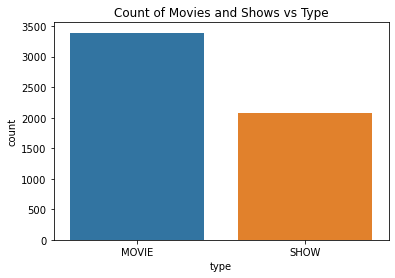

In [47]:
import jovian
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
sns.countplot(x = 'type', data=data_titles_df)
plt.title('Count of Movies and Shows vs Type')

The above graph gives us the count of movie and tv show. As per the data we can see the count of movie is more than the tv shows. 

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

In [43]:
data_titles_df['production_countries'].value_counts().head(10)

['US']    1835
['IN']     572
['JP']     257
['KR']     221
['GB']     219
['ES']     165
['FR']     112
['MX']     108
['BR']      96
['TR']      90
Name: production_countries, dtype: int64

Text(0.5, 1.0, 'country vs type(Movies and Show)')

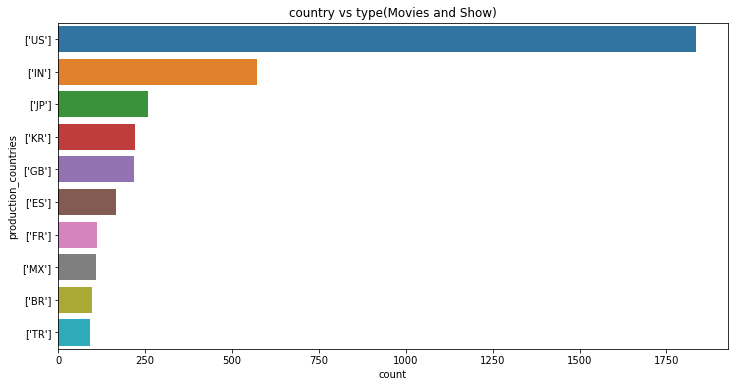

In [48]:
plt.figure(figsize =(12,6))
sns.countplot(y='production_countries' ,order = data_titles_df['production_countries'].value_counts().index[0:10],data=data_titles_df)
plt.title('country vs type(Movies and Show)')

Now separating the data for Movies and TV Shows by creating two new variables to store the data separately.

In [45]:
data_MOVIE = data_titles_df[data_titles_df['type']=='MOVIE']
data_SHOW = data_titles_df[data_titles_df['type']=='SHOW']

Text(0.5, 1.0, 'Top 10 countries producing show in Netflix')

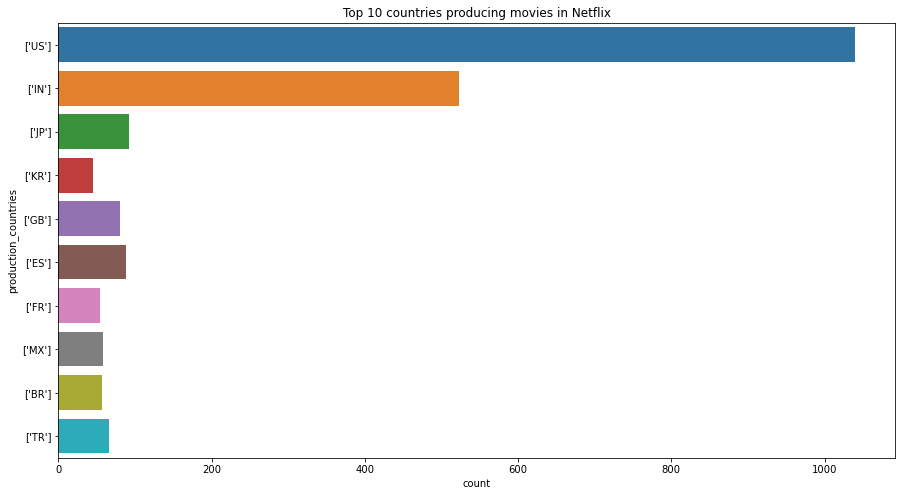

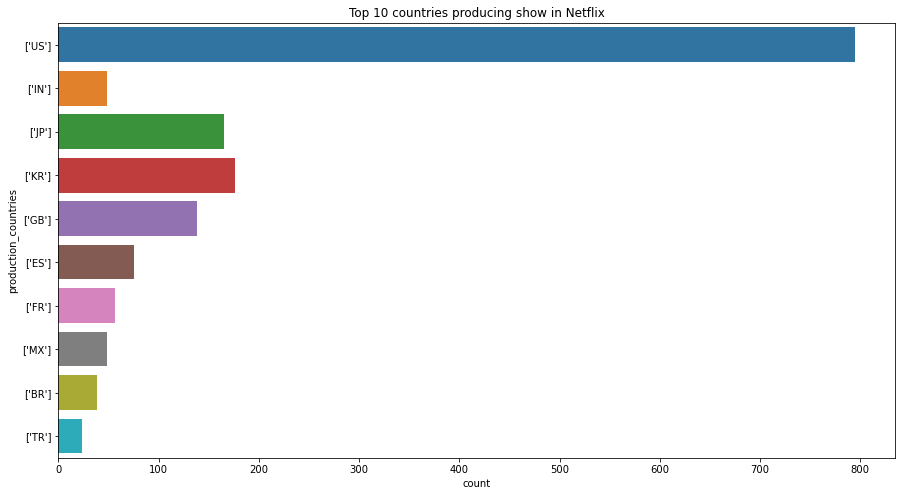

In [46]:
plt.figure(figsize = (15,8))
sns.countplot(y='production_countries',order= data_titles_df['production_countries'].value_counts().index[0:10], data=data_MOVIE)
plt.title('Top 10 countries producing movies in Netflix')

plt.figure(figsize = (15,8))
sns.countplot(y='production_countries',order= data_titles_df['production_countries'].value_counts().index[0:10], data=data_SHOW)
plt.title('Top 10 countries producing show in Netflix')

From the above we can say that US is the top country in producing Movies and TV Shows. Then the second country for movie is India and Japan for TV shows. 

Now we will check the tmdb_popularity of the data.

In [47]:
data_titles_df.tmdb_popularity.value_counts()

1.400     14
0.600      7
2.672      5
3.412      4
4.154      4
          ..
14.430     1
12.164     1
22.935     1
1.859      1
5.665      1
Name: tmdb_popularity, Length: 4804, dtype: int64

Text(0.5, 1.0, 'tmdb_popularity of shows on netflix vs count')

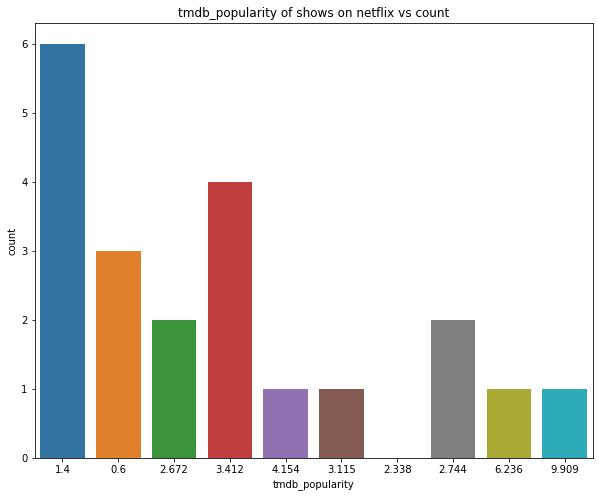

In [48]:
plt.figure(figsize = (10,8))
sns.countplot(x='tmdb_popularity',order=data_titles_df['tmdb_popularity'].value_counts().index[0:10],data=data_SHOW)
plt.title('tmdb_popularity of shows on netflix vs count')

This shows how popular are the TV shows. 

In [49]:
data_titles_df.release_year.value_counts()[:20]

2022    823
2021    760
2019    686
2018    686
2020    675
2017    440
2016    287
2015    181
2014    127
2013     91
2023     82
2012     77
2011     56
2009     52
2010     49
2008     42
2006     37
2007     35
2004     31
2005     26
Name: release_year, dtype: int64

Text(0.5, 1.0, 'Show Content released in years on Netflix')

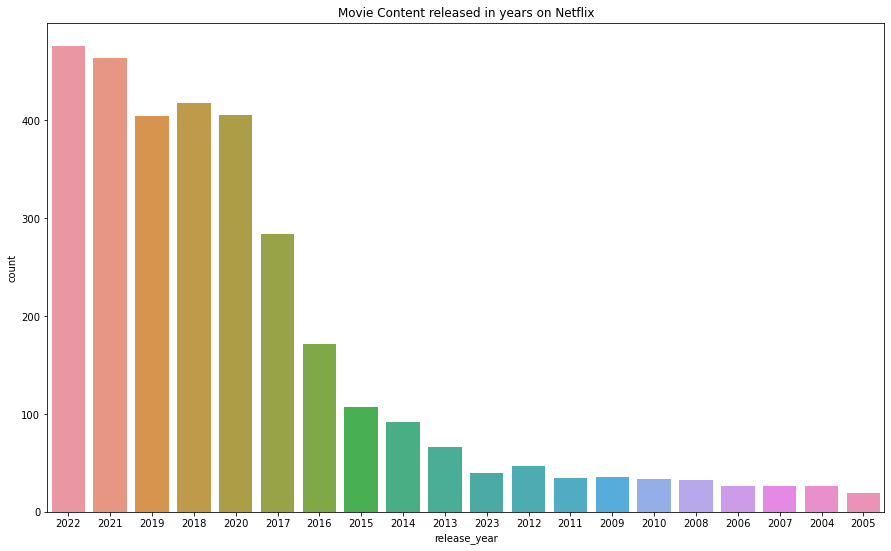

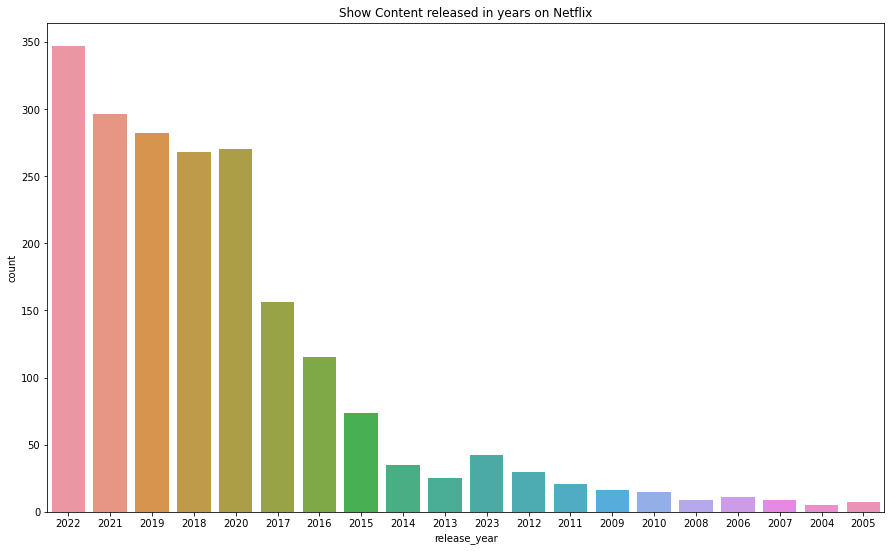

In [50]:
plt.figure(figsize = (15,9))
sns.countplot(x = 'release_year', order=data_titles_df['release_year'].value_counts().index[0:20],data=data_MOVIE)
plt.title('Movie Content released in years on Netflix')

plt.figure(figsize = (15,9))
sns.countplot(x = 'release_year', order=data_titles_df['release_year'].value_counts().index[0:20],data=data_SHOW)
plt.title('Show Content released in years on Netflix')

From the above bar graph we can say that the content getting release is increasing year over year and the maximum content is released in the year 2022.

Let's see the popular genres on netflix.

Text(0.5, 1.0, 'Top 20 Genres on Netflix')

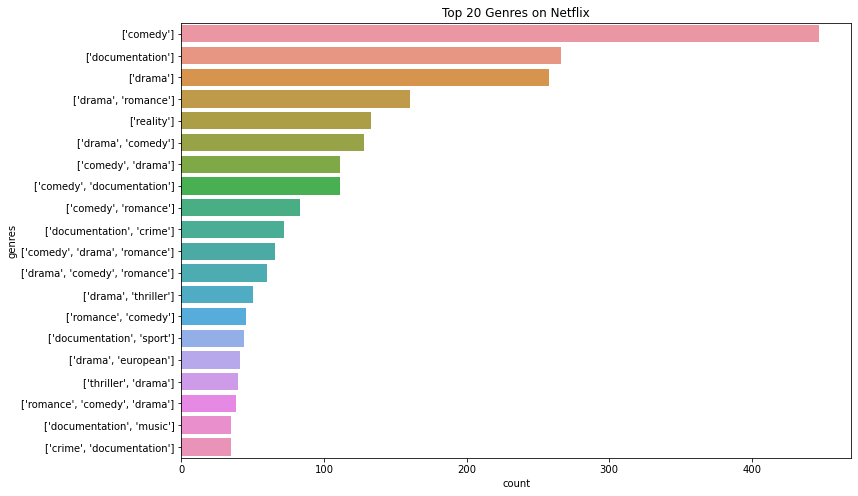

In [51]:
plt.figure(figsize = (12,8))
sns.countplot(y='genres',order=data_titles_df['genres'].value_counts().index[0:20],data=data_titles_df)
plt.title('Top 20 Genres on Netflix')

Summary
. Netflix has more Movies than Shows
. United States top in producing the content for Movies and Shows
. In 2022 most content is produced on netflix 
. Comedy and documentation are the most popular genres on netflix.

In [1]:
import jovian

In [2]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

## Asking and Answering Questions

We will now explore the data by asking some questions and getting answers in form of graphs.



#### Q1: Which is the most popular character from the data on Netflix?

In [54]:
data_credits_df.head(10)

,person_id,id,name,character,role
0,3180,tm82169,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,7748,tm82169,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,7749,tm82169,Burt Young,Paulie Pennino,ACTOR
3,7750,tm82169,Carl Weathers,Apollo Creed,ACTOR
4,7751,tm82169,Burgess Meredith,Mickey Goldmill,ACTOR
5,7752,tm82169,Thayer David,"George ""Miles"" Jergens",ACTOR
6,7753,tm82169,Joe Spinell,Tony Gazzo,ACTOR
7,7754,tm82169,Jimmy Gambina,Mike,ACTOR
8,7755,tm82169,Bill Baldwin,Fight Announcer,ACTOR
9,7756,tm82169,Al Silvani,Cut Man,ACTOR


In [55]:
data_credits_df.tail(10)

,person_id,id,name,character,role
81345,2722729,tm1072700,Amamda Ugo Grace,Efe,ACTOR
81346,2722727,tm1072700,Chris Iyanya,Joshua,ACTOR
81347,2722570,tm1072700,Korede Izobo,Peter,ACTOR
81348,2590264,tm1072700,Jide Kosoko,Olasupo,ACTOR
81349,2722633,tm1072700,Akin-Cole Muyiwa,Mr. Ake,ACTOR
81350,449518,tm1072700,Kayode Olaiya,Uncle Adio,ACTOR
81351,2722717,tm1072700,Tolu Osaile,Sade,ACTOR
81352,2722797,tm1072700,Eniola Oyetola,Officer Meks,ACTOR
81353,866314,tm1072700,Tope Tedela,Officer Jack,ACTOR
81354,1807691,tm1072700,Taiwo Egunjobi,Not available,DIRECTOR


In [56]:
data_credits_df.character.value_counts()[:20]

Not available                10823
Self                          2736
Himself                        826
Self (archive footage)         419
Herself                        308
Dancer                         177
Additional Voices (voice)      173
(voice)                        126
Self - Host                     86
Reporter                        80
Doctor                          70
Nurse                           69
Self - Contestant               52
Narrator                        52
David                           48
Narrator (voice)                45
Max                             44
Alex                            44
Bartender                       42
Anna                            41
Name: character, dtype: int64

Text(0.5, 1.0, 'character count in Movies and Show')

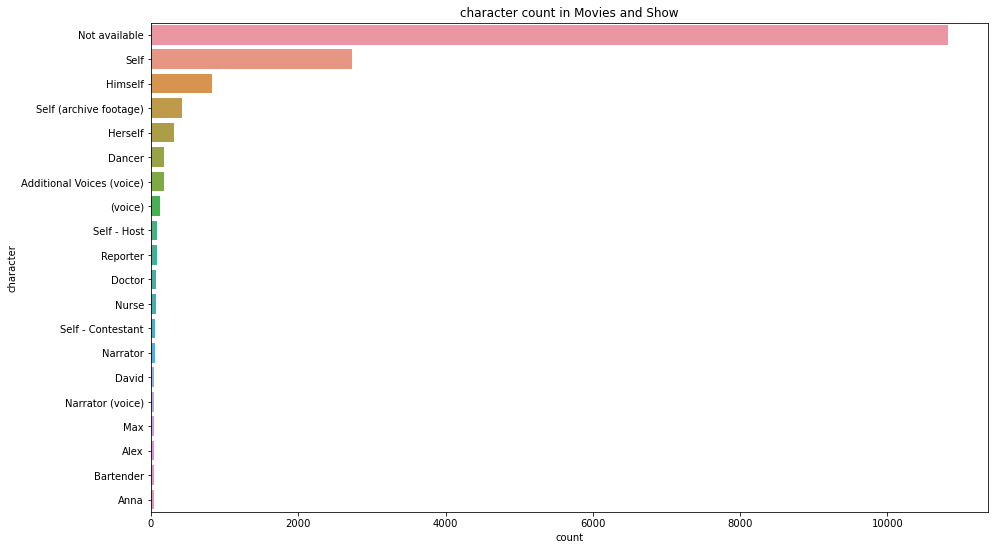

In [49]:
plt.figure(figsize = (15,9))
sns.countplot(y = 'character', order=data_credits_df['character'].value_counts().index[0:20],data=data_credits_df)
plt.title('character count in Movies and Show')

The above data gives the most popular character count.

#### Q2: Which is the Top Genres in Movies and TV Shows ?

In [58]:
data_titles_df.head(20)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Date
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0075148,8.1,588100.0,106.361,7.782,1970-01-01 00:00:00.000001976
2,tm17823,Grease,MOVIE,Australian good girl Sandy and greaser Danny f...,1978,PG,110,"['romance', 'comedy']",['US'],Not applicable,tt0077631,7.2,283316.0,33.160,7.406,1970-01-01 00:00:00.000001978
3,tm191099,The Sting,MOVIE,A novice con man teams up with an acknowledged...,1973,PG,129,"['crime', 'drama', 'comedy', 'music']",['US'],Not applicable,tt0070735,8.3,266738.0,24.616,8.020,1970-01-01 00:00:00.000001973
4,tm69975,Rocky II,MOVIE,After Rocky goes the distance with champ Apoll...,1979,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0079817,7.3,216307.0,75.699,7.246,1970-01-01 00:00:00.000001979
5,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'comedy']",['GB'],Not applicable,tt0071853,8.2,547292.0,20.964,7.804,1970-01-01 00:00:00.000001975
6,tm17249,Animal House,MOVIE,"At a 1962 College, Dean Vernon Wormer is deter...",1978,R,109,['comedy'],['US'],Not applicable,tt0077975,7.4,123611.0,17.372,7.020,1970-01-01 00:00:00.000001978
7,ts22164,Monty Python's Flying Circus,SHOW,A British sketch comedy series with the shows ...,1969,TV-14,30,"['comedy', 'european']",['GB'],4.0,tt0063929,8.8,75654.0,24.773,8.258,1970-01-01 00:00:00.000001969
8,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],Not applicable,tt0079470,8.0,405022.0,19.787,7.762,1970-01-01 00:00:00.000001979
9,tm16479,White Christmas,MOVIE,Two talented song-and-dance men team up after ...,1954,Not available,120,"['comedy', 'music', 'romance']",['US'],Not applicable,tt0047673,7.5,46586.0,11.598,7.200,1970-01-01 00:00:00.000001954
10,tm91699,Heroes,MOVIE,A Vietnam veteran suffering from post traumati...,1977,PG,112,"['drama', 'comedy', 'romance']",['US'],Not applicable,tt0076138,6.0,1883.0,7.869,6.500,1970-01-01 00:00:00.000001977


Text(0.5, 1.0, 'seasons count for the Shows in Netflix')

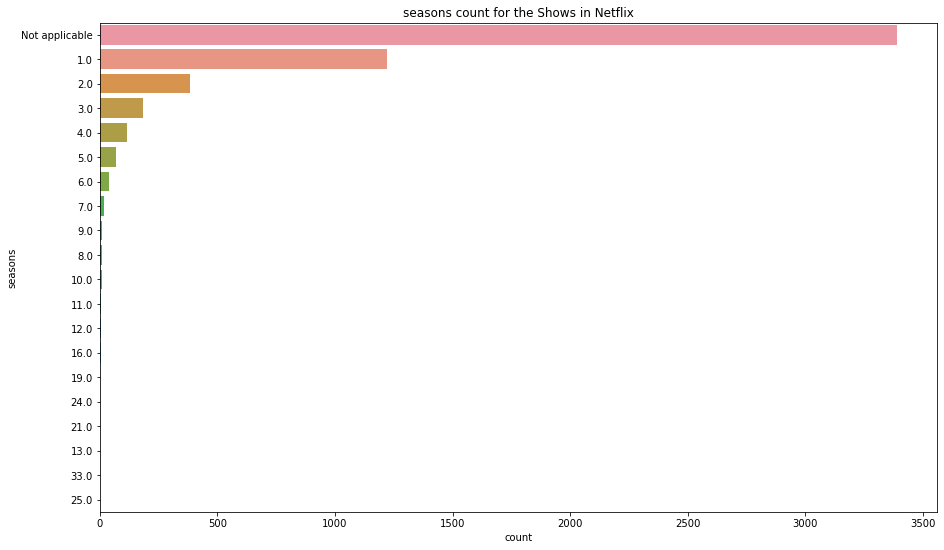

In [50]:
plt.figure(figsize = (15,9))
sns.countplot(y = 'seasons', order=data_titles_df['seasons'].value_counts().index[0:20],data=data_titles_df)
plt.title('seasons count for the Shows in Netflix')

In [82]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

The most popular genres for movies and tv shows is comedy. 

#### Q3: Find the Netflix film duration from the data ?

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


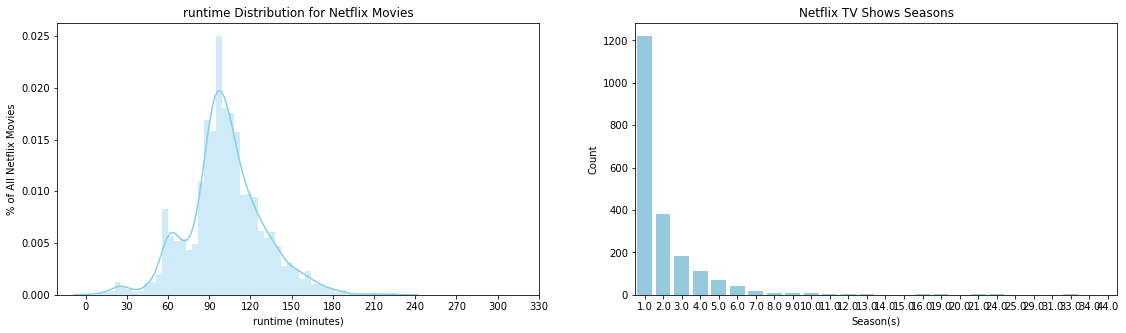

In [68]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(data_MOVIE.runtime, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("runtime Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("runtime (minutes)")
g2 = sns.countplot(data_SHOW.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show()

The above graphs gives the runtime in minutes for Shows and Movies. 

#### Q4: What is the percentage of Netflix Movies and Show ?

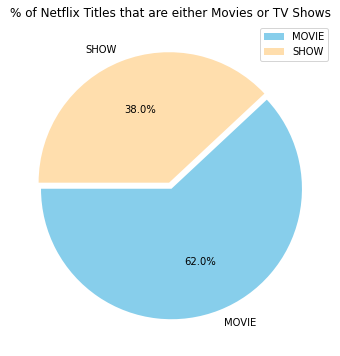

In [69]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(data_titles_df.type.value_counts(), explode=(0.025,0.025), labels=data_titles_df.type.value_counts().index, colors=['skyblue','navajowhite'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

The percentage of movies is more than the tv shows on netflix. 

#### Q5: Find the top 10 actors on Netflix based on number of titles ?

In [72]:
merged_data = data_titles_df.merge(data_credits_df,on=["id"])
merged_data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,Date,person_id,name,character,role
0,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0075148,8.1,588100.0,106.361,7.782,1970-01-01 00:00:00.000001976,3180,Sylvester Stallone,"Robert ""Rocky"" Balboa",ACTOR
1,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0075148,8.1,588100.0,106.361,7.782,1970-01-01 00:00:00.000001976,7748,Talia Shire,"Adrianna ""Adrian"" Pennino",ACTOR
2,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0075148,8.1,588100.0,106.361,7.782,1970-01-01 00:00:00.000001976,7749,Burt Young,Paulie Pennino,ACTOR
3,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0075148,8.1,588100.0,106.361,7.782,1970-01-01 00:00:00.000001976,7750,Carl Weathers,Apollo Creed,ACTOR
4,tm82169,Rocky,MOVIE,"When world heavyweight boxing champion, Apollo...",1976,PG,119,"['drama', 'sport']",['US'],Not applicable,tt0075148,8.1,588100.0,106.361,7.782,1970-01-01 00:00:00.000001976,7751,Burgess Meredith,Mickey Goldmill,ACTOR


In [ ]:
person_ID: The person ID on JustWatch.
id: The title ID on JustWatch.
name: The actor or director's name.
character_name: The character name.
role: ACTOR or DIRECTOR.

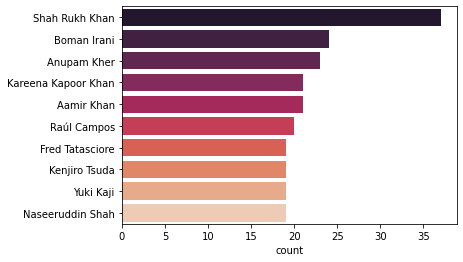

In [74]:
filtered_name = merged_data[merged_data.name != 'No name'].set_index('title').name.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
sns.countplot(y = filtered_name, order=filtered_name.value_counts().index[:10], palette='rocket')
plt.show()

The most popular actor is Shah Rukh Khan from the above analysis on netflix. 

In [5]:
import jovian

In [6]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

## Inferences and Conclusion

From the above analysis Netflix has grown over the years. We found a lot of insights from the data.The top actors, percentage of movies and shows. Netflix's original subscriber base was based solely in the United States following its IPO. A large part of its success was due to the decision to expand to international markets. The popular markets prioritizes what content the company will release. In this case, we can see that a good amount of international movies and TV shows were added over the years as part of Netflix's global expansion.

In [3]:
import jovian

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'

## References and Future Work

References - https://www.kaggle.com/code/joshuaswords/netflix-data-visualization
             https://www.youtube.com/watch?v=csXmVBw8cdo
             
Future Work - To explore different types of graph in the data.    
            - The graphs could be made clearer by setting the colours to the respective team colours.

In [3]:
import jovian

In [4]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "07poojapal/netflix-movies-and-tv-shows" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/07poojapal/netflix-movies-and-tv-shows


'https://jovian.com/07poojapal/netflix-movies-and-tv-shows'